### Assignment 5  

#### Name: Eve Tarpey Date: 16/11/23
-------------------------------------------------------------------------------------------------------------------------
We will investigate radioactive decay using the Monte Carlo method.
### Background

The collective behavior of a large number of radioactive atoms can be described, however, predicting the decay of any single atom is only possible through statistical probabilities.

The statistical formula for the decay of N radioactive atoms as a function of time:
### $$ N(t) = N_0 exp(−\lambda t) = N_0 exp(\frac{−t}{\tau}) = N_0 exp(\frac{-0.693t}{ t_{\frac{1}{2}}}) $$

where 
- $ N_0 $ is the number of atoms present at time t = 0.
- N(t) is number remaining at later time t. 
- The decay constant $ \lambda = \frac{1}{\tau} $ where $\tau$ is the average lifetime. 
- $ t_\frac{1}{2} $ is the half life - the time it takes, on average, for half the radioactive atoms in a sample to decay.


Initially, at t = 0 there are a number ($N_0$) of "parent" atoms. 

As the atoms decay, the number of parent atoms (N(t)) becomes smaller and the number of "daughter" atoms (D(t)) increases correspondingly.
 
**Number of undecayed (parent) atoms at time:**
$$ N(t) = N_0 e^{({\lambda}{t})} $$ 

**Number of decayed (daughter) atoms at time:**
$$ D(t) = N_0 − N(t) = N_0(1 − e^{(−\lambda t)}) $$ 




The probability of decay of an individual atom in 1 second, p, is related to the decay constant, $\lambda$ by:

$$ \lambda = ln(\frac{1}{1 − p}) $$

So for a Monte Carlo simulation of the decay of the parent atoms we can generate random numbers to correspond to this value p. 

-------------------------------------------------------------------------------------------------------------------------------


**Task 1**: 
- Simulate the radioactive decay of a large initial number of atoms $N_0$ at time t = 0.

- For the initial sample take the decay probability p = 0.04 per second (a 4% chance of decay in 1 second). 

- For each time step, calculate N(t), and also D(t), the number of daughter atoms (intially zero) and plot the results as points.

- Estimate the half life from the monte carlo method and compare it to the theoretical expectation using the formula: $ \frac{ln(2)}{\lambda} $

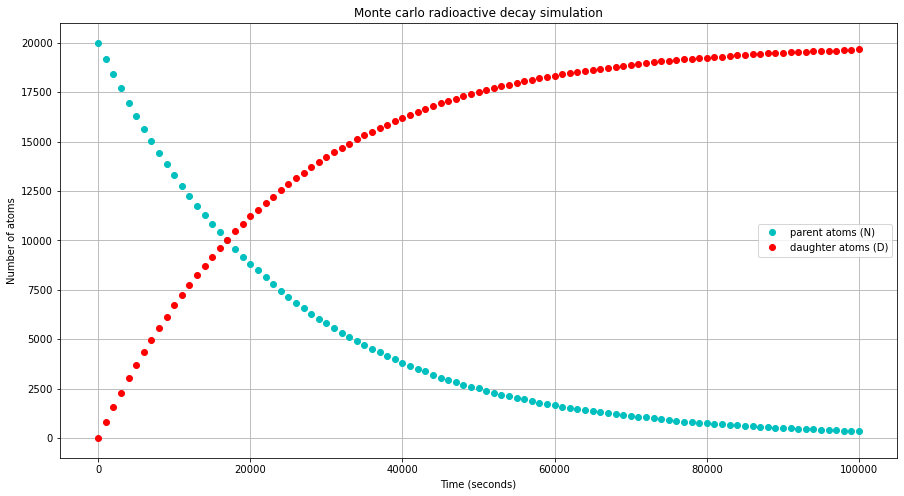

Monte carlo estimate of half life: 17 seconds
Theoretical half life expected value:  16.979748 seconds


In [154]:
import numpy as np                              # to perform mathematical operations
import random as rdm                            # to generate random numbers
import matplotlib.pyplot as plt                 # to plot and display our graphs

# state parametres
N_0 = 20000                                     # initial number of atoms, random number to test
p = 0.04                                        # probability of an atom decaying
t_0 = 0                                         # initial time value, unit: seconds
t_total = 100000                                # total time, unit: seconds, random number to test
lam = np.log(1 / (1 - p))                       # decay constant, unit: seconds
time_step = 1000                                # time step, unit: seconds, random number to test
N = N_0                                         # current number of undecayed atoms

# create arrays to store the number of atoms at each time step
time_steps = np.arange(t_0, t_total + 1, time_step)
N_t = np.zeros(len(time_steps))                  # number of parent atoms remaining
D_t = np.zeros(len(time_steps))                  # number of daughter atoms formed

# initialise the first elements with the initial number of atoms
N_t[0] = N_0
D_t[0] = 0

# use a loop to run the monte carlo simulation for each time step
for i in range(1, len(time_steps)):
    lam_count = 0                                # initialise the decay count for the current time step
    for atom in range(int(N_t[i - 1])):
        if rdm.random() < p:                     # generate a random number and compare with the decay probability "p"
            lam_count += 1                       # if random number is less than "p", count the atom as decayed
            
    N_t[i] = N_t[i - 1] - lam_count              # update number of parent atoms
    D_t[i] = D_t[i - 1] + lam_count              # update number of daughter atoms


plt.figure(figsize=(15, 8))                      # to enlarge the graph

# plot the results
plt.plot(time_steps, N_t, "co", label= "parent atoms (N)")
plt.plot(time_steps, D_t, "ro", label= "daughter atoms (D)")

plt.xlabel("Time (seconds)")                     # label the x axis
plt.ylabel("Number of atoms")                    # label the y axis

# title the graph
plt.title("Monte carlo radioactive decay simulation")  

plt.legend()                                     # create a legend to distinguish between parent and daughter atoms
plt.grid()                                       # display a grid
plt.show()                                       # show the graph

# find the time step that best approximates the half life of the radioactive decay process and print the estimate
half_life_estimate = np.argmin(abs(N_t - 0.5 * N_0))
print(f"Monte carlo estimate of half life: {half_life_estimate} seconds")

# calculate and print theoretical half life using formula
calculated_half_life = np.log(2) / lam
print(f"Theoretical half life expected value: {calculated_half_life: .8g} seconds")

We can see from the results that the Monte carlo estimate is very close the the calculated theoretical half life value.
The time step value that I chose was quite accurate.


**Theoretical expectation = monte carlo estimate $\pm$ 0.02 seconds**

**Theoretical expectation = $17 \pm 0.02 \approx 16.979748 $ seconds**

-----------------------------------------------------------------------------------------------------------
### Background 
Sometimes a radioactive decay process gives rise to an unstable daughter product which then decays (with a different decay constant) into a "grandaughter" G(t). 

Defining the decay constant and decay probability for the parent atom as $\lambda_1$ and $P_1$ and for the daughter species as $\lambda_2$ and $P_2$ we have now that:


$$ N(t) = N_0 e^{(−\lambda_1 t)} $$


Which is the same as before since what later becomes of the daughter species has no influence on the decay of the parent species. The number of daughter atoms is now:


$$ D(t) =\frac{\lambda_1 N_0}{\lambda_1 - \lambda_2} (exp(−\lambda_2 t) − exp(−\lambda_1 t))$$



and the number of grandaughter atoms is


$$ G(t) = N_0 − N (t) − D(t) $$


What happens this time is that the number of daughter atoms increases at first but then begins to fall as the supply of parent atoms dwindles and because of decays into grandaughters.


In summary, the radioactive decay of an atom is a true random process. We can describe the average behaviour of a collections of atoms but we cannot predict the decay of any individual atom. 

---------------------------------------------------------------------------------------------------------------

**Task 2:**
- Now consider that the daughter species is also radioactive and decays with p = 0.015 per second. 
- Plot the mother, daughter and grandaughter species as a function of time. Estimate the time at which the daughter population reaches a peak. 

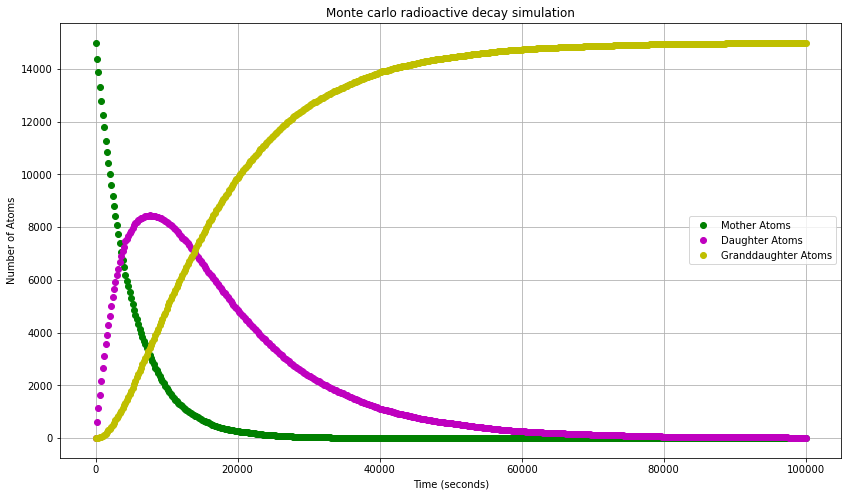

The time at which the daughter atom population is at peak is at 7600 seconds.


In [155]:
# state parametres
N_0 = 15000                                        # initial number of mother atoms
p_mother = 0.04                                    # decay probability for mother
p_daughter = 0.015                                 # decay probability for daughter
t_0 = 0                                            # initial time, unit: seconds
t_total = 100000                                   # total time, unit: seconds
time_step = 200                                    # time step, unit: seconds

# create an array to store time steps
time_steps = np.arange(t_0, t_total + 1, time_step)

# generate arrays to store the number of atoms
N_mother = np.zeros(len(time_steps))               # mother atoms remaining
N_daughter = np.zeros(len(time_steps))             # daughter atoms remaining
N_granddaughter = np.zeros(len(time_steps))        # granddaughter atoms remaining


N_mother[0] = N_0                                  # initialise the the mother atoms 

# Monte carlo simulation loop that iterates through each time step
for i in range(1, len(time_steps)):
    decay_mother = 0                               # initialise the mother atom decay count for the current time step
    decay_daughter = 0                             # initialise the daughter atom decay count for the current time step

    # decay of mother atoms
    for atom in range(int(N_mother[i - 1])):
        if rdm.random() < p_mother:
            decay_mother += 1

    # decay of daughter atoms
    for atom in range(int(N_daughter[i - 1])):
        if rdm.random() < p_daughter:
            decay_daughter += 1

    # update atom counts
    N_mother[i] = N_mother[i - 1] - decay_mother
    N_daughter[i] = N_daughter[i - 1] + decay_mother - decay_daughter
    N_granddaughter[i] = N_granddaughter[i - 1] + decay_daughter

plt.figure(figsize=(14, 8))                        # enlarge the graph

# plot the graph
plt.plot(time_steps, N_mother, "go", label="Mother Atoms")
plt.plot(time_steps, N_daughter, "mo", label="Daughter Atoms")
plt.plot(time_steps, N_granddaughter, "yo", label="Granddaughter Atoms")

plt.xlabel("Time (seconds)")                       # label the x axis
plt.ylabel("Number of Atoms")                      # label the y axis

# title the graph
plt.title("Monte carlo radioactive decay simulation")

plt.legend()                                       # create a legend in order to distinguish bewteen the three atoms
plt.grid()                                         # display a grid
plt.show()                                         # show the graph

# to find the monte carlo estimate of the time at which the daughter population of atoms peaks and print the value
peak_daughter = np.array(N_daughter).argmax()
print(f"The time at which the daughter atom population is at peak is at {peak_daughter * time_step } seconds.")

### Background
The Monte Carlo method can also be used to simulate diffusion and absorption, and phenomena such as Brownian motion. Here we investigate nuclear reaction shielding, in a reactor for example.

- Consider a 1-D nuclear reactor shield that is B atoms thick. 

- A large flux of neutrons from a nuclear reactor core impacts the shield, and at each atomic layer there is a probability that a neutron will be absorbed. If a neutron is not absorbed, it continues to the next atom.

- The thickness of the shield (the value of B) needs to be sufficient to reduce the flux of neutrons to an acceptable and safe value.

---------------------------------------------------------------------------------------------------------------------------
**Task 3**:
- Estimate, by a Monte Carlo method, the value of B required to reduce the exit flux of neutrons to 50% of the incident flux.
- Take the absorption probability, p at each atom to be 5%. 
- The initial number of incident neutrons should be a number large enough to give an accurate answer but not so large that the computational time becomes excessive.

In [197]:
# define a function that simulates nuclear reaction shielding. we are dealing with neutrons, thus define as neutron shield
def neutron_shield(B, p_absorption, N_neutrons):      
    absorbed_neutrons = 0                         # initialise the count of absorbed neutrons
    for neutron in range(N_neutrons):
        for atoms in range(B):                    # loop over each atom, as it is B atoms thick
            if random.random() < p_absorption:    # check if a neutron is absorbed based on the absorption probability

                absorbed_neutrons += 1            # increment the count
                break                             # break the loop if a neutron is absorbed

    # calculate the remaining neutrons that are not absorbed
    remaining_neutrons = N_neutrons - absorbed_neutrons
    return remaining_neutrons

**Note**
- B = thickness of reactor shield 
- p_absorption = absorption probability of the neutrons
- N_neutrons = initial number of neutrons

In [196]:
# state parametres
p_absorb = 0.05                                   # absorption probability of the neutron(5%)
N_neutrons = 10000                                # initial number of neutrons

# search for the minimum thickness (B) where the exit flux is <= 50% of the incident flux
for B in range(1, 25): 
    
    # call the function for each thickness value and calculate remaining neutrons
    remaining_neutrons = neutron_shield(B, p_absorption, N_neutrons)
    
    # calculate the ratio of remaining to initial neutrons as a percentage
    exit_flux_ratio = (remaining_neutrons / N_neutrons) * 100
    

    # check if the exit flux is less than or equal to 50% of the initial flux
    if exit_flux_ratio <= 50:       
        
        # print the minimum thickness required
        print(f"Minimum shield thickness (B) : {B} atoms thick.")
        
        # print the exit flux as a percentage of the incident flux
        print(f"Exit flux: {exit_flux_ratio}% of the incident flux")
        

        break                                      # break the loop once the condition is met

Minimum shield thickness (B) : 14 atoms thick.
Exit flux: 49.26% of the incident flux


Thus, we have found the the value of B required to reduce the exit flux of neutrons to $\approx$ 50% of the incident flux.

------------------------------------------------------------------------------------------------------------------------------
**Task 4**: 
- Develop your program to calculate the fraction of transmitted neutrons (those that do not get absorbed) as B is varied.
- Plot the number of transmitted atoms versus B. 
- Determine the value of B required to reduce the exit flux of neutrons to 0.1% or less

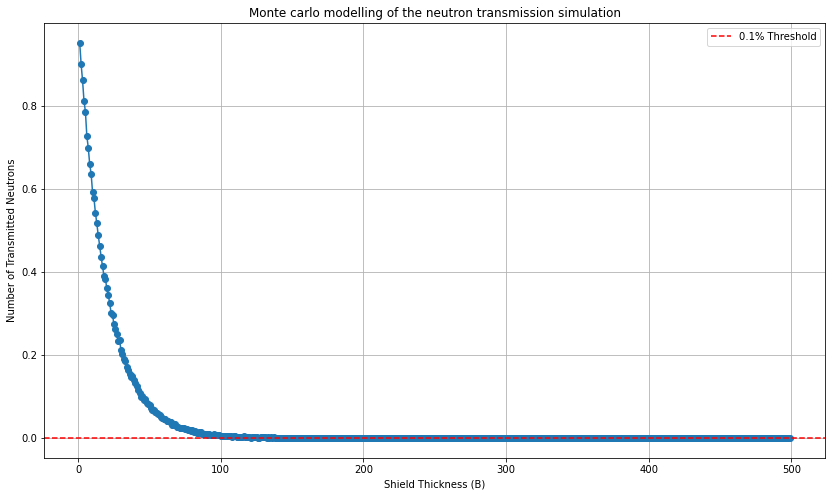

In [185]:
# store thickness and transmitted neutron values in lists
B_values = []                                      # thickness values (B)
transmitted_neutrons = []                          # transmitted neutrons 

# initialise min_B to a large number beyond the range of expected B values
min_B = 1000

# loop through shield thicknesses from 1 to 499
for B in range(1, 500):
    
    # calculate remaining neutrons after shielding
    remaining_neutrons = neutron_shield(B, p_absorption, N_neutrons)
    
    # calculate the fraction of neutrons transmitted
    fraction_transmitted = remaining_neutrons / N_neutrons  
    
    # append current thickness and fraction of neutrons transmitted to their respective lists
    B_values.append(B)
    transmitted_neutrons.append(fraction_transmitted)  
    
    
    # update min_B if current thickness reduces transmission to 0.1% or less
    if fraction_transmitted <= 0.001 and B < min_B:
        min_B = B
        
plt.figure(figsize=(14,8))                        # enlarge the graph                     

# plot the graph and include the 0.1% line on the graph
plt.plot(B_values, transmitted_neutrons, marker='o')
plt.axhline(y=0.001, color='r', linestyle='--', label='0.1% Threshold')

plt.xlabel("Shield Thickness (B)")                # label the x axis        
plt.ylabel("Number of Transmitted Neutrons")      # label the y axis

# title the graph
plt.title("Monte carlo modelling of the neutron transmission simulation")

plt.grid()                                        # display a grid
plt.legend()                                      # show a legend to distinguish the 0.1% line
plt.show()                                        # show the graph

In [183]:
# convert the list to an array
transmitted_neutrons_array = np.array(transmitted_neutrons)

# find the index of the element closest to 0.1% of N_neutrons
index_min = np.argmin(abs(transmitted_neutrons_array - 0.001))

# get the corresponding value of B required to reduce the exit flux of neutrons to 0.1% or less
B_min_index = B_values[index_min]

# print the results
print(f"Index of thickness (B) value closest to 0.1% transmission: {index_min} atoms thick")
print(f"Thickness (B) value at this index: {B_min_index} atoms thick")

# for the minimum B to reduce exit flux to 0.1% or less
if min_B < 1000:
    print(f"Minimum thickness (B) to reduce exit flux to 0.1% or less: {min_B} atoms thick")

Index of thickness (B) value closest to 0.1% transmission: 129 atoms thick
Thickness (B) value at this index: 130 atoms thick
Minimum thickness (B) to reduce exit flux to 0.1% or less: 126 atoms thick
